# 과적합(Overfitting)의 이해

실제 데이터와 머신러닝의 추정치가 일치하지 않는 현상

## #01. 과적합의 구분

### [1] 과대적합 (Over Fitting)

모델이 너무 복잡해서 데이터의 구조를 제대로 학습하지 못하는 경우.

> 모델이 복잡하다는 것은 요인이 너무 많다는 것을 의미함

훈련 정확도보다 검증 정확도가 현저하게 떨어진다.

> ex) 훈련정확도가 `99%`이지만 검증 정확도는 `65%`인 경우

![res/overfitting2.png](res/overfitting2.png)

#### 해결방법

- **샘플 수를 늘려서 모델이 충분히 학습할 수 있도록 함**
- 훈련 데이터의 특성 수를 줄임 (차원축소)
- 훈련 데이터의 잡음을 줄임 (이상치 제거)
- 파라미터 수가 적은 모델을 선택
- 모델을 단순화 시킴

> 결국은 변수를 줄이거나 가중치를 제한하라는 뜻

### [2] 과소적합 (Under Fitting)

분석 모델이 너무 단순해서 데이터의 구조를 제대로 학습하지 못하는 경우.

> 모델이 단순하다는 의미는 변수(피처)의 수가 부족함을 의미함

훈련 정확도와 검증 정확도의 차이는 크지 않지만 전체적으로 낮은 성능을 내는 경우

![res/overfitting1.png](res/overfitting1.png)

#### 해결방법

- **변수의 수를 늘림**
- 모델 파라미터가 더 많은 모델을 선택 (단순선형회귀 -> 다항회귀)
- 학습 알고리즘에 더 좋은 특성을 제공(하이퍼파라미터 튜닝)
- 모델의 제약을 줄인다.

> 결국은 모델을 더 복잡하게 만들기 위해 변수를 늘리라는 뜻

### [3] 과대적합, 과소적합 비교

> 순서대로 과대적합, 과소적합, 최적을 의미

![img](res/overfitting-img.png)

### [4] 일반화

실제 데이터가 학습 데이터와 차이가 있더라도 생성된 모델의 성능 차이가 나타나지 않게 하는 것

#### 일반화의 방법

##### 속성 줄이기

- 복잡성이 너무 높을 경우 과대적합 확률이 높음.
- 결과에 크게 영향을 주지 않는 속성을 제거

##### 정규화

- 속성의 단위가 서로 달라서 결과에 여향을 미치는 영향이 달라지는 것을 방지하기 위해 사용함

##### 검증

- 오류의 정도를 측정하고 그 결과를 바탕으로 모델의 성능을 개선함

### [5] 학습 곡선 (Learning Curve)

학습 데이터의 양을 늘려가면서 모델의 성능을 평가하여 그래프로 그리는 것.

이를 통해 현재 데이터의 양이 적당한지, 더 모으면 모델의 성능이 증가할지 등에 대한 단서를 얻을 수 있다.

sklearn에서는 교차 검증을 사용하여 모델을 훈련하고 평가하는 `learning_curve()` 함수가 있다.

훈련 세트의 크기를 증가시키면서 모델을 재훈련하고 모델을 평가한 훈련 세트 크기와 각각의 샘플 크기와 교차 검증 폴드에서 측정한 훈련 및 검증 점수를 반환한다.

#### (1) 과소적합에 대한 학습곡선 예시

<img src="res/under-chart.png" width="480" />

##### 훈련 데이터에 대한 설명

1. 그래프가 `0`에서 시작하므로 훈련 세트에 하나 혹은 두 개의 샘플이 있을 때는 모델이 완벽하게 작동한다.
2. 하지만 훈련 세트에 샘플이 추가됨에 따라 점점 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능해 진다. 그래서 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승한다.
3. 어느 정도 평편해진 후에는 대체로 일정하게 유지된다. 이 위치에서는 훈련 세트에 샘플이 추가되어도 평균 오차가 크게 나아지거나 나빠지지 않는다.
4. 그렇다면 이 모델은 이후 더 많은 데이터를 학습하더라도 성능 향상을 기대하기 어렵다.

##### 검증 데이터에 대한 설명

1. 모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화 될 수 없기 때문에 검증 오차가 초기에 매우 크다.
2. 모델에 훈련 데이터가 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소한다.
3. 하지만 선형 회귀의 직선은 데이터를 정확히 모델링 할 수는 없기 때문에 오차가 완만하게 감소하면서 훈련 세트의 그래프와 가까워진다.

> 과소적합은 훈련 샘플을 더 추가해도 효과가 없다. 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 한다.

#### (2) 과대적합에 대한 학습곡선 예시

<img src="res/over-chart.png" width="480" />

1. 훈련 데이터의 오차가 이전보다 훨씬 낮다.
2. 두 곡선 사이에 공간이 있다.
    - 이 말은 검증 데이터보다 훈련 데이터에서 모델이 훨씬 더 나은 성능을 보인다는 것을 의미한다. 
    - 이는 과대적합 모델의 특징이다.
    - 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.

> 과대 적합 모델을 개선하는 방법은 검증 오차가 훈련 오차에 근접할 때 까지 더 많은 훈련 데이터를 추가하는 것이다.

### 참고

학습곡선과 비슷한 목적으로 사용되는 시각화 자료로 검증곡선(Validation Curve)이 있다.

검증곡선은 모델 객체를 생성하는 과정에서 설정되는 하이퍼파라미터중 하나의 값을 조절해 가면서 학습률을 시각화 하여 비교하는 형태이다.

하지만 이미 GridSearchCV를 통해 최적의 하이퍼파라미터를 찾는 기능을 구현하고 있기 때문에 검증곡선을 직접 확인해가면서 직접 최적의 하이퍼파라미터를 찾는 과정은 번거로움을 추가할 뿐이라 할 수 있겠다.

## #02. 준비작업

### [1] 패키지 참조

In [27]:
import warnings
warnings.filterwarnings(action='ignore')

from helper.regrassion import *
from helper.util import *
from helper.plot import *
from helper.analysis import *

import numpy as np
from sklearn.model_selection import learning_curve

## #03. 속도에 따른 제동거리 데이터의 경우

### [1] 데이터 가져오기

In [28]:
origin = my_read_excel("https://data.hossam.kr/mldata/cars.xlsx", info = False)
my_pretty_table(origin.head())

+----+---------+--------+
|    |   speed |   dist |
|----+---------+--------|
|  0 |       4 |      2 |
|  1 |       4 |     10 |
|  2 |       7 |      4 |
|  3 |       7 |     22 |
|  4 |       8 |     16 |
+----+---------+--------+


### [2] 데이터 분할

In [29]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='dist', test_size=0.3, scalling=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35, 1), (15, 1), (35,), (15,))

### [3] 선형회귀 모델 구현

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.464509 |
+----+-------------------+

[회귀식]
dist = 3.760 * speed + -15.540

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |        0.80035 |             9.87575 |             136.768 |          11.6948 |                         38.8652 |              -2.16828 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+-

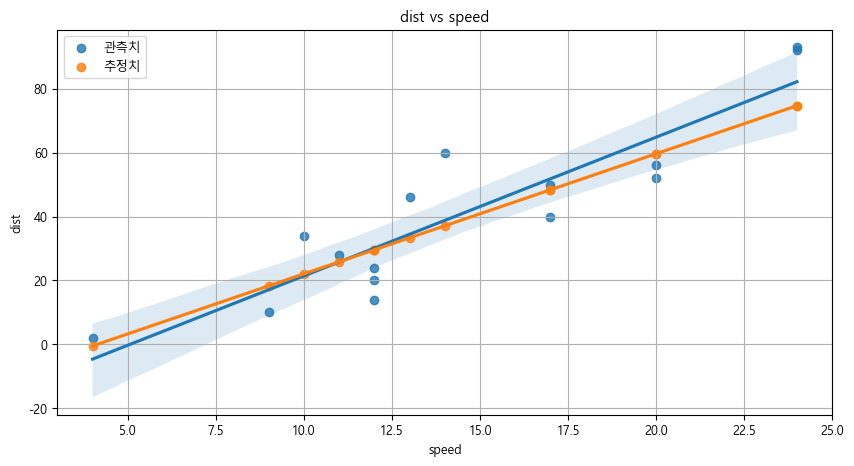

LinearRegression(n_jobs=-1)

In [30]:
fit = my_linear_regrassion(x_train, y_train, x_test, y_test, degree=1, cv=5, use_plot=True, dpi=100, figsize=(10, 5), report=True)
fit

### [4] 학습곡선

#### (1) 전체 샘플에 대해 독립변수와 종속변수 구분

In [31]:
x = origin.drop('dist', axis=1)
y = origin['dist']

#### (2) 학습곡선 데이터 반환받기

평가지표(`scoring`)이 없을 경우 각 모델별로 기본 평가지표가 사용됨

| 평가지표 | 값 |
|---|---|
| `R2` | `r2` |
| `RMSE` | `neg_root_mean_squared_error` |
| `MSE` | `neg_mean_squared_error` |

In [32]:
train_sizes, train_scores, test_scores = learning_curve(fit, x, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 10), scoring='neg_root_mean_squared_error')

print(train_sizes)
print(train_scores)
print(test_scores)

[ 1  5 10 15 20 25 30 35 40 45]
[[ -0.          -0.          -0.          -0.          -0.
   -0.          -0.          -0.          -0.          -0.        ]
 [ -7.94355084  -6.23263301  -6.23263301  -6.23263301  -6.23263301
   -6.23263301  -6.23263301  -6.23263301  -6.23263301  -6.23263301]
 [ -6.9275411   -6.01454254  -7.1535955   -7.1535955   -7.1535955
   -7.1535955   -7.1535955   -7.1535955   -7.1535955   -7.1535955 ]
 [ -7.79432583  -7.27233332  -7.53460458  -6.79751306  -6.79751306
   -6.79751306  -6.79751306  -6.79751306  -6.79751306  -6.79751306]
 [-14.2172902  -14.05671307 -13.92101851 -14.07937541  -7.45213735
   -7.45213735  -7.45213735  -7.45213735  -7.45213735  -7.45213735]
 [-13.57837599 -13.36995659 -13.34426145 -13.39454791  -7.95219067
  -13.10031717 -13.10031717 -13.10031717 -13.10031717 -13.10031717]
 [-14.54693402 -14.5799656  -14.42953589 -14.5623211  -11.13413066
  -13.97682397 -12.65953501 -12.65953501 -12.65953501 -12.65953501]
 [-14.99274331 -14.85702423 -14.

#### (3) 학습곡선 그래프 그리기

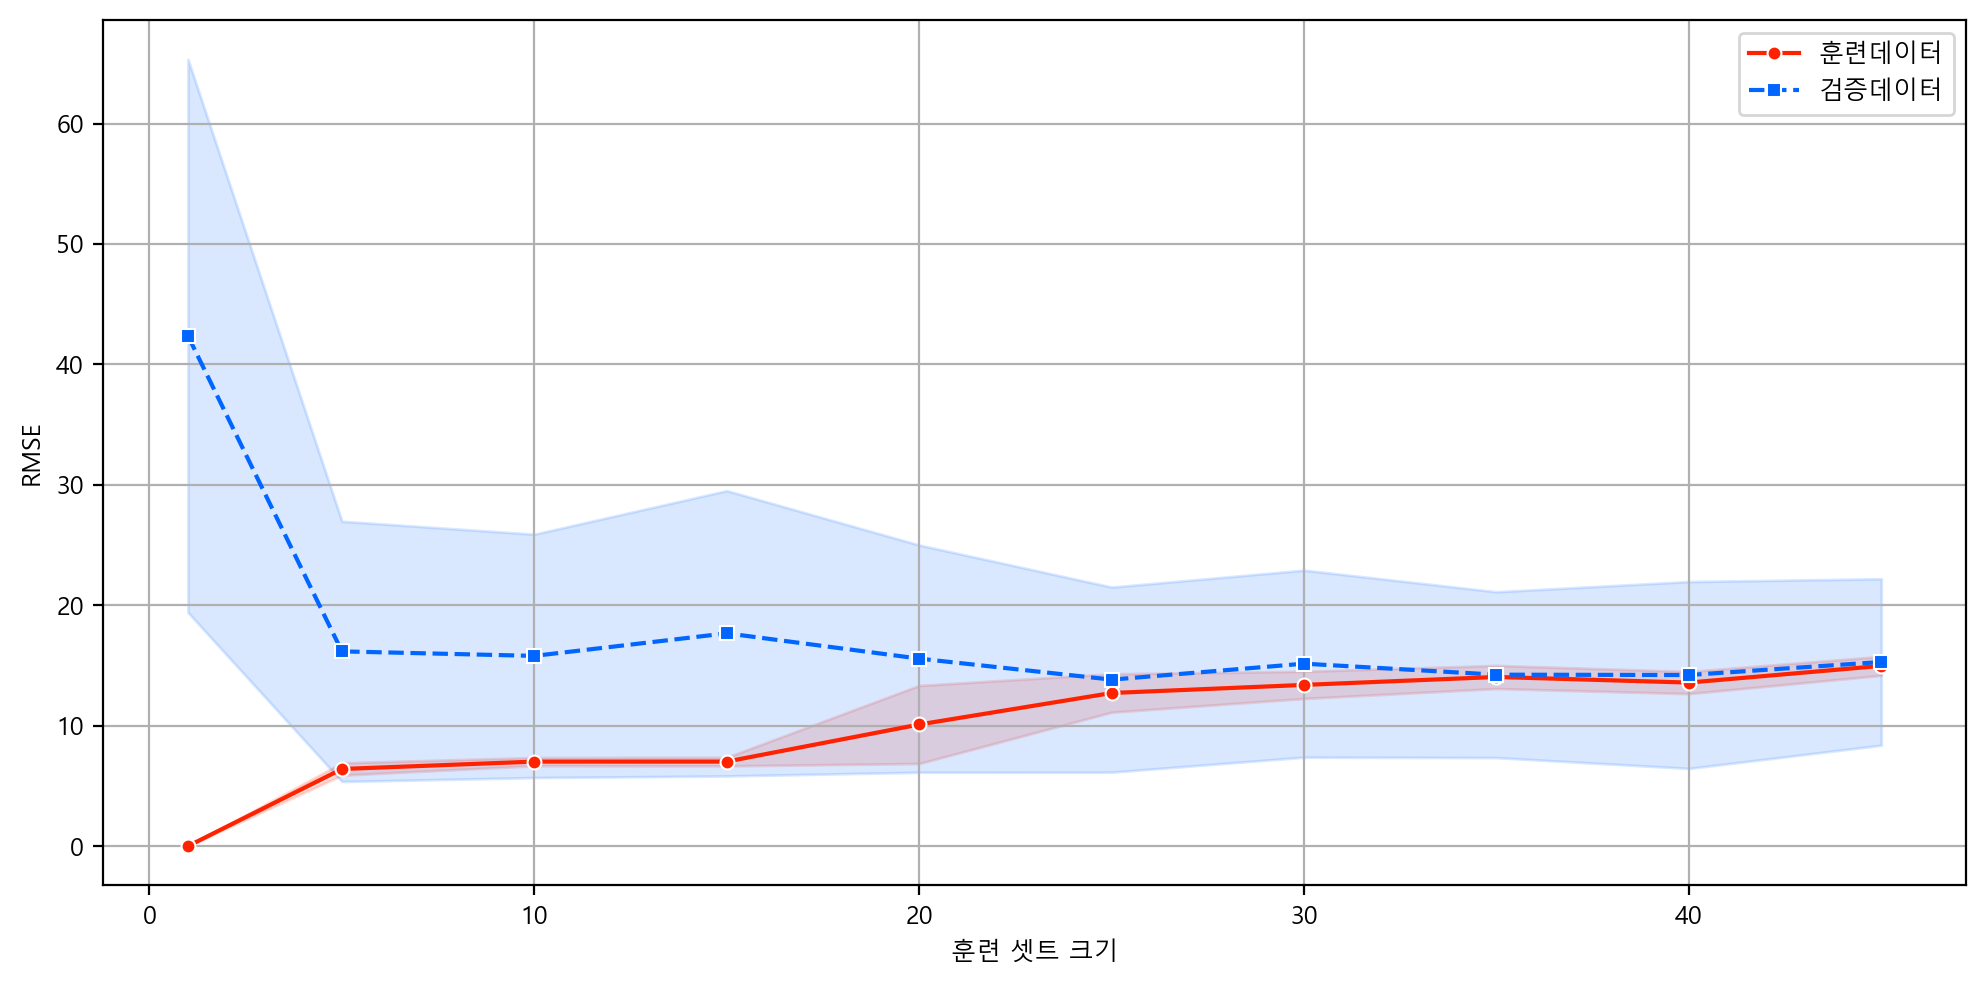

In [33]:
train_mean = -np.mean(train_scores, axis=1)
train_std = -np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1) 
test_std = -np.std(test_scores, axis=1)

plt.figure(figsize=(10, 5), dpi=200)

# 훈련 데이터 수에 따른 훈련 데이터의 score 평균
sb.lineplot(x=train_sizes, y=train_mean,  marker='o', markersize=5, label='훈련데이터', color='#ff2200')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='#ff2200')

# 검증 데이터 수에 따른 검증 데이터의 score 평균
sb.lineplot(x=train_sizes, y=test_mean, linestyle='--', marker='s', markersize=5, label='검증데이터', color='#0066ff')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='#0066ff')

plt.grid()
plt.xlabel('훈련 셋트 크기')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

> 처음에는 검증데이터의 성능보다 훈련데이터의 성능이 더 높게 나타나는 과대적합이 발생하지만 데이터의 샘플 수가 25를 넘어서면서 학습 성능과 검증 성능이 비슷해지는 것을 볼 수 있다.
> 
> 아직 학습 성능이 검증 성능보다 높은 상태로 간격이 유지된다면 이 모델은 아직 학습이 충분히 진행되지 않았고, 편향이 크다고 할 수 있지만 이 모델은 학습 성능과 검증 성능의 차이가 크지 않으므로 충분히 학습된 상태라고 볼 수 있다.
>
> 학습 성능과 검증 성능의 간격이 학습 데이터 수를 늘려도 유지된다면 더 이상의 성능 향상이 기대되지는 않는다는 사실을 의미한다.

## #04. 농어의 무게 예측 모형의 경우

### [1] 데이터 가져오기

In [34]:
origin = my_read_excel("https://data.hossam.kr/mldata/fish.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   길이      56 non-null     float64
 1   높이      56 non-null     float64
 2   두께      56 non-null     float64
 3   무게      56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB
None

데이터프레임 상위 5개 행
+----+--------+--------+--------+--------+
|    |   길이 |   높이 |   두께 |   무게 |
|----+--------+--------+--------+--------|
|  0 |    8.4 |   2.11 |   1.41 |    5.9 |
|  1 |   13.7 |   3.53 |      2 |     32 |
|  2 |     15 |   3.82 |   2.43 |     40 |
|  3 |   16.2 |   4.59 |   2.63 |   51.5 |
|  4 |   17.4 |   4.59 |   2.94 |     70 |
+----+--------+--------+--------+--------+

데이터프레임 하위 5개 행
+----+--------+--------+--------+--------+
|    |   길이 |   높이 |   두께 |   무게 |
|----+--------+--------+--------+--------|
| 51 |     42 |   12.8 |   6.87 |   1100 |
| 52 |     43 |  11.93 |   7.28 |   1000 |
| 53 |     43

### [2] 데이터 분할

In [35]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='무게', test_size=0.3, scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39, 3), (17, 3), (39,), (17,))

### [3] 선형회귀 모형

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.912264 |
+----+-------------------+

[회귀식]
무게 = 55.163 * 길이 + 163.657 * 높이 + 122.869 * 두께 + 400.551

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.919246 |             58.2871 |             8828.88 |          93.9621 |                          327.91 |               304.702 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[선형회귀분석 결과보고]
+----+------------+------------+--------------------+-------

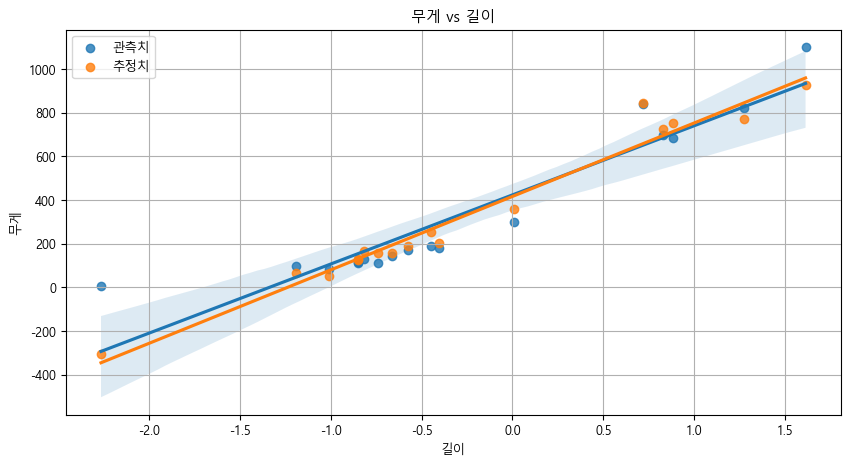

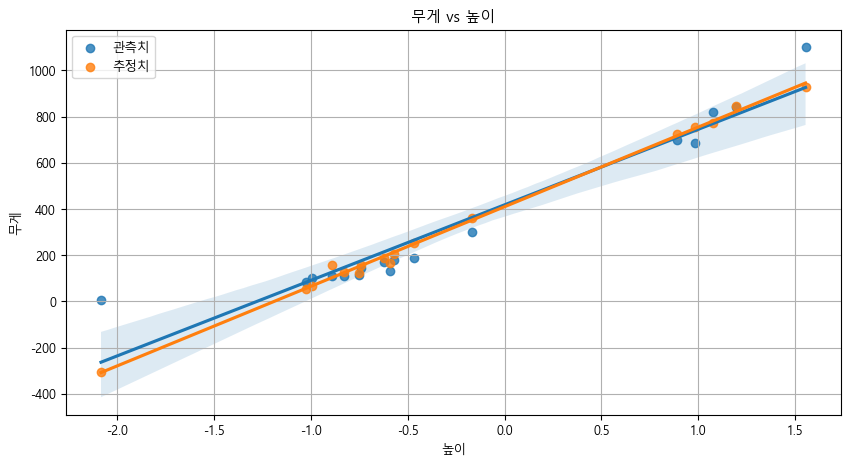

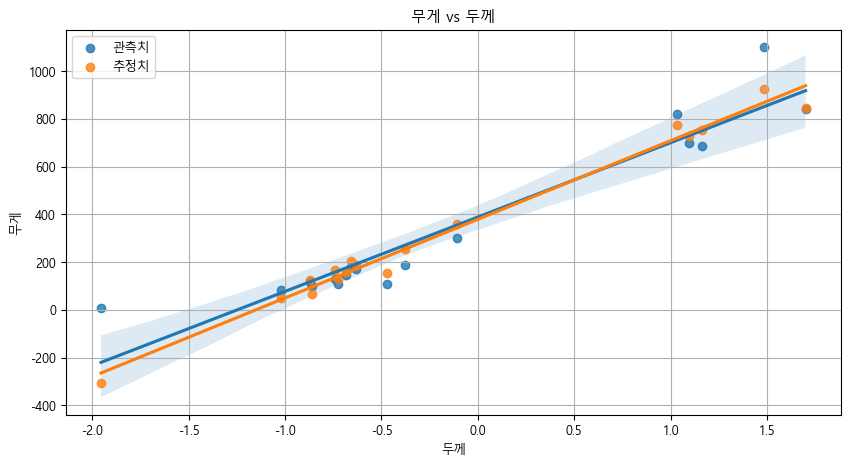

LinearRegression(n_jobs=-1)

In [36]:
fit = my_linear_regrassion(x_train, y_train, x_test, y_test, degree=1, cv=5, use_plot=True, dpi=100, figsize=(10, 5), report=True)
fit

### [4] 모듈화 기능을 활용한 학습 곡선 확인

In [37]:
# my_learing_curve(fit, data=origin, yname='무게', scalling=True, scoring='RMSE')

> 학습곡선으로 보아 모델이 과대적합 되어 있다. 과대적합을 개선하기 위해 훈련 모델에 더 많은 샘플을 추가해야 한다.

## #05. 보스턴 집값 데이터의 경우

### [1] 데이터 가져오기

In [38]:
origin = my_read_excel("https://data.hossam.kr/mldata/boston.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

데이터프레임 상위 5개 행
+----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------+
|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD 

### [2] 데이터 분할

In [39]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname="MEDV", scalling=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((354, 13), (354,), (152, 13), (152,))

### [3] 선형회귀 모델 구현

In [40]:
ignore = ['TAX', 'INDUS', 'AGE', 'CHAS', 'CRIM', 'RAD', 'ZN', 'B']
x_train_drop = x_train.drop(ignore, axis=1)
x_test_drop = x_test.drop(ignore, axis=1)

my_linear_regrassion(x_train_drop, y_train, x_test_drop, y_test, use_plot=False, report=True)

[회귀식]
MEDV = -1.661 * NOX + 3.516 * RM + -2.192 * DIS + -2.192 * PTRATIO + -3.987 * LSTAT + 22.762

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.603232 |             3.97022 |               32.07 |          5.66304 |                         21.3872 |              -5.53031 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+--------+------------+---------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 | 

LinearRegression(n_jobs=-1)

### [4] 모듈화 기능을 활용한 학습 곡선 확인

In [42]:
df = origin.drop(ignore, axis=1)
# my_learing_curve(fit, data=df, yname='MEDV', scalling=True, scoring='RMSE')

> 훈련곡선으로 보아 에러율이 높고 훈련 데이터와 검증 데이터 곡선간의 간격이 다소 크게 나타나는 것으로 보아 과대적합이 발생하고 있다.
>
> 다만 샘플 크기가 400을 넘어서면서 간격이 줄어들고 일정하게 유지되기 시작한 것으로 보아 더 많은 샘플을 투입하여 학습할 경우 이 간격이 유지되는지에 대한 확인이 필요하다.